In [1]:
!pip install shap
!pip install numpy --upgrade

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


### Probando con mi data!

In [2]:
import shap
shap.initjs()
import numpy as np
import pandas as pd
### SEED configuration
from numpy.random import seed
seed(0)
from tensorflow import random
random.set_seed(1)

In [3]:
filename = 'processed_data/mfccs_big_and_small.npy'
with open(filename, 'rb') as f:
    Xb = np.load(f)
    yb = np.load(f)
    Xs = np.load(f)
    ys = np.load(f)
# Check that we've recovered the right data
print(f'Xb:{Xb.shape}, yb:{yb.shape}')
print(f'Xs:{Xs.shape}, ys:{ys.shape}')

Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)


Transformando mi arreglo de MFCCs a pandas para etiquetar los coeficientes

In [4]:
Xs_df = pd.DataFrame(Xs, columns = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11'])

In [5]:
ys

array([1, 1, 1, ..., 8, 8, 8])

In [6]:
Xs_df

c0         c1         c2         c3         c4         c5  \
0    -702.163330  80.802284   3.883376  14.403243   6.492595  16.079937   
1    -693.686035  81.977707   0.860524  14.913647   8.803263  16.428877   
2    -690.341431  81.333008   3.807817  13.230121   6.822927  12.191733   
3    -686.847168  78.666862   6.274260  15.669453   7.158701  14.297801   
4    -732.367432  88.758560   6.665466  16.737360   7.218538  16.858025   
...          ...        ...        ...        ...        ...        ...   
1435 -590.162109  53.753437 -23.759680   4.462462 -13.004509  -4.554060   
1436 -505.768951  74.027550 -19.440039   3.379026 -18.008896  -5.445320   
1437 -520.334351  70.308556 -29.046867   6.547709 -16.622381  -3.427793   
1438 -477.293732  53.162842 -17.893354  15.398247 -14.126958   1.942991   
1439 -511.484253  50.166519  -8.478876  10.790966 -12.967088   4.883754   

             c6        c7         c8         c9       c10       c11  
0     -3.533843  3.629457  -3.921897  -1.820921 -9.289974 -2.480374  
1     -5.274174  4.807358  -4.575912  -4.715497 -9.325332 -2.080277  
2     -4.124456  4.595205  -5.924147  -3.801232 -9.429503 -4.059545  
3     -2.798083  6.361864  -5.557229  -3.574653 -8.638301 -2.742951  
4     -3.897938  5.073871  -6.443877  -1.111537 -9.430692 -4.425053  
...         ...       ...        ...        ...       ...       ...  
1435 -16.508995 -5.493339 -18.259062  -9.855295 -4.015972 -8.144102  
1436 -22.678919 -6.702610 -13.282467 -11.606638 -5.915680 -5.149740  
1437 -27.245527 -8.328244 -14.237591 -11.625559 -3.890793 -1.679807  
1438 -16.329203  0.851780 -16.873123  -3.126481 -2.335870 -4.601626  
1439 -12.929078 -4.706934  -9.538481  -5.279773 -8.104300 -3.095685  

[1440 rows x 12 columns]

## Entrenando el modelo y calculando los SHAP values. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [8]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.05, random_state=42)

In [9]:
model = RandomForestClassifier()

In [10]:
model.fit(X_train_s,y_train_s)

RandomForestClassifier()

In [11]:
np.unique(y_train_s)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
predictions = model.predict(X_test_s)
print(accuracy_score(y_test_s, predictions))
print(" ")
confusion_matrix(y_test_s,predictions)

0.6111111111111112
 


array([[ 3,  1,  0,  2,  0,  0,  0,  0],
       [ 1, 11,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  3],
       [ 0,  3,  1,  2,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  6,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  6,  0,  2],
       [ 1,  0,  0,  1,  0,  0,  6,  0],
       [ 0,  1,  2,  1,  0,  1,  0, 10]])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


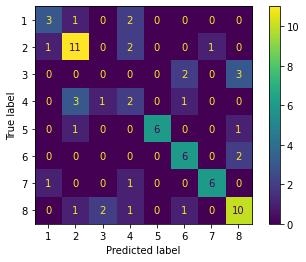

In [13]:
plot_confusion_matrix(model, X_test_s, y_test_s)
plt.show() 

In [14]:
label_conversion = {'1': 'neutral',
                     '2': 'calm',
                     '3': 'happy',
                     '4': 'sad',
                     '5': 'angry',
                     '6': 'fearful',
                     '7': 'disgust',
                     '8': 'surprised'}

In [15]:
#'0': 'neutral'
#'1': 'calm'
#'2': 'happy'
#'3': 'sad'
#'4': 'angry'
#'5': 'fearful'
#'6': 'disgust'
#'7': 'surprised'

### Tuning the model

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1600, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 40, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1600, 1633, 1666, 1700, 1733, 1766, 1800, 1833, 1866, 1900], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_s, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 22, 24, 26, 28, 30,
                                                      32, 34, 36, 38, 40,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1600, 1633, 1666, 1700,
                                                         1733, 1766, 1800, 1833,
                                                         1866, 1900]},
                   random_state=42, verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 38,
 'bootstrap': True}

In [19]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [20]:
# Baseline
base_model = RandomForestClassifier()

# Base Accuracy
base_model.fit(X_train_s, y_train_s)
base_accuracy = evaluate(base_model, X_test_s, y_test_s)

# Best Model by Random Search
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_s, y_test_s)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.2917 degrees.
Accuracy = 64.25%.
Model Performance
Average Error: 1.1250 degrees.
Accuracy = 69.66%.
Improvement of 8.43%.


In [21]:
best_random.fit(X_train_s, y_train_s)

RandomForestClassifier(max_depth=38, n_estimators=1800)

In [22]:
predictions = best_random.predict(X_test_s)
print(accuracy_score(y_test_s, predictions))
print(" ")
confusion_matrix(y_test_s,predictions)

0.6388888888888888
 


array([[ 3,  2,  0,  1,  0,  0,  0,  0],
       [ 1, 11,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  2],
       [ 0,  1,  1,  4,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  6,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  6,  0,  2],
       [ 0,  1,  0,  1,  0,  0,  6,  0],
       [ 0,  1,  2,  1,  0,  1,  0, 10]])

In [23]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 38,
 'bootstrap': True}

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


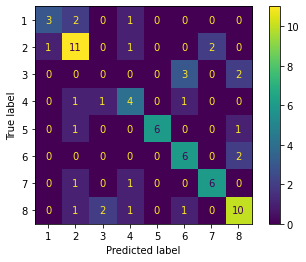

In [24]:
plot_confusion_matrix(best_random, X_test_s, y_test_s)
plt.show() 

### Observando los SHAP Values con etiquetado de coeficientes!

In [25]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs_df, ys, test_size=0.05, random_state=42)

In [26]:
X_train_s.shape

(1368, 12)

In [27]:
X_test_s.shape

(72, 12)

In [28]:
X_test_s

c0          c1         c2         c3         c4         c5  \
168  -536.251282   92.255722  -7.260184  16.638079   5.525358  18.834932   
605  -725.868164   96.935532  19.353928  33.146568  11.663172  24.759007   
548  -551.685730   83.588440  -1.258835   8.126911  -0.182136  14.700078   
65   -636.175354   87.146133  -7.884516  10.127149  -0.848407   3.994573   
628  -540.464294   76.908966   2.425844  20.243292  -1.637380  11.062680   
...          ...         ...        ...        ...        ...        ...   
44   -645.988281   92.586075  -0.103698  14.392345   1.045655  16.478745   
946  -633.709595   67.705521   1.305173  14.330976   1.173126   3.263055   
1102 -716.374695  101.293999  10.337679  19.604015   2.384300  15.749336   
793  -539.001099   53.467503 -12.482813   2.579818  -6.071829   0.809989   
353  -699.509827   75.734085 -10.654613   0.994564  -3.499296   4.704550   

             c6         c7         c8         c9        c10       c11  
168  -19.968775   0.410151 -16.074329   4.008134  -5.490429 -3.225534  
605    5.842375  10.318305   2.699517   0.674075   0.104756  1.378317  
548  -16.404758  -0.906090 -18.563803 -11.216290  -4.534711 -3.530033  
65   -13.146500   5.135944 -13.706629  -5.002185  -3.341196 -5.089184  
628   -5.706191   5.695498  -0.769288  -0.626422  -4.342915 -2.374341  
...         ...        ...        ...        ...        ...       ...  
44    -8.631339   4.120159 -11.372694  -3.634738 -13.551770 -5.362347  
946  -14.455660  -5.702735 -11.291181  -1.369778  -7.044086 -5.108091  
1102   6.848921  10.127686  -9.257400  -8.381862  -1.314438  1.808383  
793  -19.725805  -0.453848 -11.214961  -7.739349  -1.092411 -6.033402  
353  -14.950562  -4.201883 -11.085130 -10.935597  -0.728962 -3.062244  

[72 rows x 12 columns]

In [29]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 0
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [30]:
print(label_conversion[str(y_test_s[i])])

disgust


In [31]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 1
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [32]:
print(label_conversion[str(y_test_s[i])])

calm


In [33]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 2
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [34]:
print(label_conversion[str(y_test_s[i])])

calm


In [35]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 3
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [36]:
print(label_conversion[str(y_test_s[i])])

calm


In [37]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 4
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [38]:
print(label_conversion[str(y_test_s[i])])

angry


In [39]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 5
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [40]:
print(label_conversion[str(y_test_s[i])])

calm


In [41]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 6
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [42]:
print(label_conversion[str(y_test_s[i])])

calm


In [43]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 7
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [44]:
print(label_conversion[str(y_test_s[i])])

fearful


In [45]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 8
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [46]:
print(label_conversion[str(y_test_s[i])])

surprised


In [47]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 9
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [48]:
print(label_conversion[str(y_test_s[i])])

calm


In [49]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 10
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [50]:
print(label_conversion[str(y_test_s[i])])

disgust


In [51]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 11
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [52]:
print(label_conversion[str(y_test_s[i])])

surprised


In [53]:
X_test_s.shape

(72, 12)

In [54]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 12
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [55]:
print(label_conversion[str(y_test_s[i])])

sad


In [56]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 13
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [57]:
print(label_conversion[str(y_test_s[i])])

fearful


In [58]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 14
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [59]:
print(label_conversion[str(y_test_s[i])])

sad


In [60]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 15
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [61]:
print(label_conversion[str(y_test_s[i])])

disgust


In [62]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 16
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [63]:
print(label_conversion[str(y_test_s[i])])

angry


In [64]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 21
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [65]:
print(label_conversion[str(y_test_s[i])])

neutral


In [66]:
shap.initjs()
# observando 20 resultados de SHAP values con 12 mel cepstral coefficients
i = 30
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train_s, 200))
shap_values = explainer.shap_values(X_test_s.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s.iloc[i,:])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [67]:
print(label_conversion[str(y_test_s[i])])

surprised


### Global!

In [68]:
shap.initjs()
shap_values = explainer.shap_values(X_test_s)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_s)

  0%|          | 0/72 [00:00<?, ?it/s]

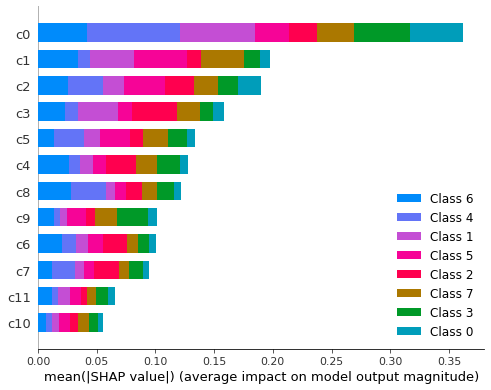

In [69]:
shap.initjs()
shap.summary_plot(shap_values,X_test_s,feature_names=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11'])